In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
from scipy import fftpack
import seaborn as sns
style.use('seaborn')

In [2]:
target_set = pd.read_csv("assets/bearing_classes.csv",sep=";")
origin_set = pd.read_csv("assets/bearing_signals.csv")

In [3]:
def rename_column(df,prefix):
    column_name = list(df.columns)
    column_name = [prefix + name for name in column_name]
    return df.set_axis(column_name, axis=1)

In [4]:
df_train = origin_set.drop(['experiment_id','bearing_1_id', 'timestamp'],axis=1)

In [5]:
df_train.columns

Index(['bearing_2_id', 'a1_x', 'a1_y', 'a1_z', 'a2_x', 'a2_y', 'a2_z', 'rpm',
       'hz', 'w'],
      dtype='object')

In [7]:
max_set = df_train.groupby(['bearing_2_id']).max()
max_set = rename_column(max_set,"max_")
min_set = df_train.groupby(['bearing_2_id']).min()
min_set = rename_column(min_set,"min_")
mean_set = df_train.groupby(['bearing_2_id']).mean()
mean_set = rename_column(mean_set,"mean_")
std_set = df_train.groupby(['bearing_2_id']).std()
std_set = rename_column(std_set,"std_")
median_set = df_train.groupby(['bearing_2_id']).median()
median_set = rename_column(median_set,"median_")
range_set = df_train.groupby(['bearing_2_id']).max() - df_train.groupby(['bearing_2_id']).min()
range_set = rename_column(range_set,"range_")
kurtosis_set = df_train.groupby(['bearing_2_id']).apply(pd.DataFrame.kurtosis)
kurtosis_set = rename_column(kurtosis_set, 'kurtosis_')
skew_set = df_train.groupby(['bearing_2_id']).skew()
skew_set = rename_column(skew_set, 'skew_')

In [8]:
df = pd.concat([max_set, min_set, mean_set, std_set, median_set, range_set, kurtosis_set, skew_set], axis=1)
df['target']= target_set.iloc[1:,1]

In [28]:
df.columns

Index(['max_a1_x', 'max_a1_y', 'max_a1_z', 'max_a2_x', 'max_a2_y', 'max_a2_z',
       'max_rpm', 'max_hz', 'max_w', 'min_a1_x', 'min_a1_y', 'min_a1_z',
       'min_a2_x', 'min_a2_y', 'min_a2_z', 'min_rpm', 'min_hz', 'min_w',
       'mean_a1_x', 'mean_a1_y', 'mean_a1_z', 'mean_a2_x', 'mean_a2_y',
       'mean_a2_z', 'mean_rpm', 'mean_hz', 'mean_w', 'std_a1_x', 'std_a1_y',
       'std_a1_z', 'std_a2_x', 'std_a2_y', 'std_a2_z', 'std_rpm', 'std_hz',
       'std_w', 'median_a1_x', 'median_a1_y', 'median_a1_z', 'median_a2_x',
       'median_a2_y', 'median_a2_z', 'median_rpm', 'median_hz', 'median_w',
       'range_a1_x', 'range_a1_y', 'range_a1_z', 'range_a2_x', 'range_a2_y',
       'range_a2_z', 'range_rpm', 'range_hz', 'range_w',
       'kurtosis_bearing_2_id', 'kurtosis_a1_x', 'kurtosis_a1_y',
       'kurtosis_a1_z', 'kurtosis_a2_x', 'kurtosis_a2_y', 'kurtosis_a2_z',
       'kurtosis_rpm', 'kurtosis_hz', 'kurtosis_w', 'skew_a1_x', 'skew_a1_y',
       'skew_a1_z', 'skew_a2_x', 'skew_a2_y',

In [ ]:
df1 = df.drop(['min_rpm', 'max_hz', 'max_w', 'min_a1_x', 'min_a2_z',
               'min_hz', 'min_w', 'mean_hz','std_w', 'median_a2_x',
               'std_rpm','median_rpm', 'range_rpm', 'range_hz',
               'range_w', 'kurtosis_bearing_2_id', 'kurtosis_a2_y',
               'skew_rpm', 'skew_hz', 'skew_w', 'timestamp'], axis=1)

In [5]:
# df_bearing_1_x = df_train.drop(['a2_x','a2_y','a2_z','a1_y','a1_z'], axis = 1)
# df_bearing_1_y = df_train.drop(['a2_x','a2_y','a2_z','a1_x','a1_z'], axis = 1)
# df_bearing_1_z = df_train.drop(['a2_x','a2_y','a2_z','a1_x','a1_y'], axis = 1)
# df_bearing_2_x = df_train.drop(['a1_x','a1_y','a1_z','a2_y','a2_z'], axis = 1)
# df_bearing_2_y = df_train.drop(['a1_x','a1_y','a1_z','a2_x','a2_z'], axis = 1)
# df_bearing_2_z = df_train.drop(['a1_x','a1_y','a1_z','a2_x','a2_y'], axis = 1)
# bearing_feature = [df_bearing_1_x,df_bearing_1_y,df_bearing_1_z,df_bearing_2_x,df_bearing_2_y,df_bearing_2_z]
# list_column = ['fft_a1_x','fft_a1_y','fft_a1_z','fft_a2_x','fft_a2_y','fft_a2_z']

In [6]:
# def by_axis_bearing(bearing_feature,i):
#     max_list = []
#     for index in range(len(bearing_feature)):
#         bearing_idx = bearing_feature[index]
#         df_bearing = bearing_idx[bearing_idx['bearing_2_id'] == i]
#         fft_values = fftpack.fft(df_bearing)
#         max_amplitude = np.argmax(np.abs(fft_values))
#         max_list.append(max_amplitude)
#     return max_list
    

In [7]:
# number_bearing = df_train['bearing_2_id'].max()

# max_list = by_axis_bearing(bearing_feature,1)
# new_set = pd.DataFrame([max_list],columns=list_column,index=[1])

# for i in range(2,number_bearing+1):
#     max_list = by_axis_bearing(bearing_feature,i)
#     temp_set = pd.DataFrame([max_list],columns=list_column,index=[i])
#     new_set = new_set.append(temp_set)

In [9]:
X = df1.drop('target',axis=1)
y = df1['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_random_forest = rf.predict(X_test)
accuracy_random_forest = round(accuracy_score(y_test, y_pred_random_forest) * 100, 2)
print(f'The accuracy of RandomForest Model is : ', str(accuracy_random_forest) + '%')
print('The Cross Validation Report : ','\n', (classification_report(y_test, y_pred_random_forest)))
print(confusion_matrix(y_test, y_pred_random_forest))
scores_rf = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print(f"The Cross validation score of Random Forest model :", scores_rf)
print(f"The Mean of Random Forest model :", scores_rf.mean())
print(f"The Standard Deviation of Random Forest model :", scores_rf.std())

The accuracy of RandomForestC Model is :  91.3%
The Cross Validation Rapport :  
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.50      0.67         4

    accuracy                           0.91        23
   macro avg       0.95      0.75      0.81        23
weighted avg       0.92      0.91      0.90        23



C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Random Forest Scores : [1.         1.         1.         0.88888889 1.         1.
 1.         1.         1.         1.        ]
Random Forest Mean : 0.9888888888888889
Random Forest Standard Deviation : 0.03333333333333335


In [24]:
param_grid = {
    'n_estimators':[200,150,100,50],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8]
}

In [26]:
Model_rf = RandomForestClassifier(random_state=41)
grid = GridSearchCV(estimator=Model_rf, param_grid=param_grid, cv=5, n_jobs=None)
grid.fit(X_train, y_train)
Model_rf = grid.best_estimator_
y_pred_train = Model_rf.predict(X_test)
training_data_accuracy_rf = accuracy_score(y_test, y_pred_train)
print("The accuracy of RandomForestC Model is", (training_data_accuracy_rf*100), '%')
print('The Cross Validation Rapport : ','\n', (classification_report(y_test, y_pred_train)))
print(confusion_matrix(y_test,y_pred_train))
scores_rf = cross_val_score(Model_rf, X_train, y_train, cv=10, scoring = "accuracy")
print(f"The Cross validation score of Random Forest model :", scores_rf)
print(f"The Mean of Random Forest model :", scores_rf.mean())
print(f"The Standard Deviation of Random Forest model :", scores_rf.std())

The accuracy of RandomForestC Model is 91.30434782608695 %
The Cross Validation Rapport :  
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.50      0.67         4

    accuracy                           0.91        23
   macro avg       0.95      0.75      0.81        23
weighted avg       0.92      0.91      0.90        23

[[19  0]
 [ 2  2]]


C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


The Cross validation score of Random Forest model : [1.         1.         1.         0.88888889 1.         1.
 1.         1.         1.         1.        ]
The Mean of Random Forest model : 0.9888888888888889
The Standard Deviation of Random Forest model : 0.03333333333333335


In [16]:
rf_entropy = RandomForestClassifier(criterion='entropy', max_depth=6)
rf_entropy.fit(X_train, y_train)
y_pred_rf_entropy = rf_entropy.predict(X_test)
print(accuracy_score(y_test, y_pred_rf_entropy))
y_train_pre = rf_entropy.predict(X_train)
print(accuracy_score(y_train_pre, y_train))

0.9130434782608695
1.0


In [17]:
scores = cross_val_score(rf_entropy, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Accuracy_score", accuracy_score(y_train_pre, y_train))
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Variation:", scores.var())

C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Scores: [1.         1.         1.         0.88888889 1.         1.
 0.88888889 1.         1.         1.        ]
Accuracy_score 1.0
Mean: 0.9777777777777779
Standard Deviation: 0.04444444444444447
Variation: 0.001975308641975311


<AxesSubplot:xlabel='feature'>

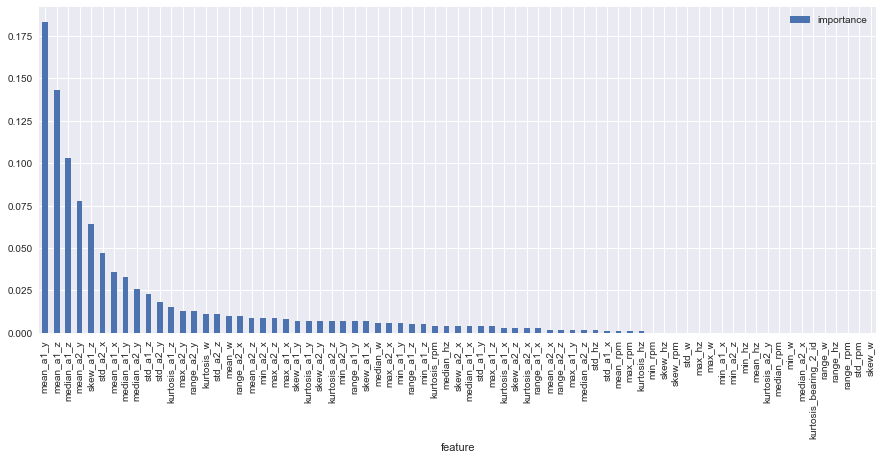

In [18]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances1 = importances.sort_values('importance',ascending=False).set_index('feature')
importances1.plot(kind='bar',figsize=(15,6))

In [27]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = round(accuracy_score(y_test, y_pred_svc) * 100, 2)
print(f'The accuracy of SVC Model is : ', str(accuracy_svc) + '%')
print('The Cross Validation Report : ','\n', (classification_report(y_test, y_pred_svc)))
print(confusion_matrix(y_test, y_pred_svc))
scores_svc = cross_val_score(svc, X_train, y_train, cv=10, scoring = "accuracy")
print(f"The Cross validation score of SVC Model :", scores_svc)
print(f"The Mean of SVC Model :", scores_svc.mean())
print(f"The Standard Deviation of SVC Model :", scores_svc.std())

The accuracy of SVC Model is :  82.61%
The Cross Validation Report :  
               precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       0.00      0.00      0.00         4

    accuracy                           0.83        23
   macro avg       0.41      0.50      0.45        23
weighted avg       0.68      0.83      0.75        23

[[19  0]
 [ 4  0]]
The Cross validation score of SVC Model : [1.         0.88888889 0.88888889 0.88888889 0.88888889 0.88888889
 0.88888889 0.88888889 0.88888889 1.        ]
The Mean of SVC Model : 0.9111111111111111
The Standard Deviation of SVC Model : 0.04444444444444447


C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sadhana\anaconda3\lib\site-packages\skle

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
print(f'The accuracy of KNN Model is : ', str(accuracy_knn) + '%')
print('The Cross Validation Report : ','\n', (classification_report(y_test, y_pred_knn)))
print(confusion_matrix(y_test, y_pred_knn))
scores_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")
print(f"The Cross validation score of KNN Model :", scores_knn)
print(f"The Mean of KNN Model :", scores_knn.mean())
print(f"The Standard Deviation of KNN Model :", scores_knn.std())

The accuracy of KNN Model is :  82.61%
The Cross Validation Report :  
               precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       0.00      0.00      0.00         4

    accuracy                           0.83        23
   macro avg       0.41      0.50      0.45        23
weighted avg       0.68      0.83      0.75        23

[[19  0]
 [ 4  0]]
The Cross validation score of KNN Model : [1.         0.88888889 1.         0.77777778 0.88888889 1.
 0.88888889 0.77777778 0.88888889 1.        ]
The Mean of KNN Model : 0.9111111111111111
The Standard Deviation of KNN Model : 0.08314794192830981


C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sadhana\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sadhana\anaconda3\lib\site-packages\skle